In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
whr = pd.read_csv('data.csv')
whr.head()

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,94.6,Western Europe
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,93.5,Western Europe
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,94.5,Western Europe
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,93.7,Western Europe
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,91.2,Western Europe


In [3]:
whr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 12 columns):
Country             153 non-null object
Happiness Rank      153 non-null int64
Happiness Score     153 non-null float64
Economy             153 non-null float64
Family              153 non-null float64
Health              153 non-null float64
Freedom             153 non-null float64
Generosity          153 non-null float64
Corruption          153 non-null float64
Dystopia            153 non-null float64
Job Satisfaction    151 non-null float64
Region              153 non-null object
dtypes: float64(9), int64(1), object(2)
memory usage: 14.4+ KB


In [4]:
whr.dropna(inplace = True)

In [5]:
whr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 152
Data columns (total 12 columns):
Country             151 non-null object
Happiness Rank      151 non-null int64
Happiness Score     151 non-null float64
Economy             151 non-null float64
Family              151 non-null float64
Health              151 non-null float64
Freedom             151 non-null float64
Generosity          151 non-null float64
Corruption          151 non-null float64
Dystopia            151 non-null float64
Job Satisfaction    151 non-null float64
Region              151 non-null object
dtypes: float64(9), int64(1), object(2)
memory usage: 15.3+ KB


In [6]:
whr.describe()

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,77.827815,5.357874,0.983895,1.190509,0.550794,0.409805,0.244914,0.123008,1.854910,75.209934
std,44.934732,1.132826,0.420955,0.286371,0.236116,0.150144,0.135236,0.102776,0.502189,12.962365
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914,44.400000
25%,39.500000,4.505500,0.663371,1.042635,0.369866,0.303677,0.152574,0.056919,1.605148,68.950000
50%,78.000000,5.279000,1.064578,1.253918,0.606042,0.437454,0.230947,0.089283,1.832910,78.100000
75%,116.500000,6.101500,1.314879,1.418162,0.715975,0.519467,0.323762,0.152207,2.161605,85.100000
max,155.000000,7.537000,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485,95.100000


In [7]:
whr.nlargest(10,'Happiness Score')['Country']


0         Norway
1        Denmark
2        Iceland
3    Switzerland
4        Finland
5    Netherlands
6         Canada
7    New Zealand
8         Sweden
9      Australia
Name: Country, dtype: object

In [8]:
whr.nsmallest(10,'Happiness Score')['Country']

152    Central African Republic
151                     Burundi
150                    Tanzania
149                       Syria
148                      Rwanda
147                        Togo
146                      Guinea
145                     Liberia
143                       Yemen
142                       Haiti
Name: Country, dtype: object

In [29]:
regions = whr.groupby('Region', axis = 0)
regions['Happiness Score'].mean().sort_values(ascending = False)

Region
North America     7.154500
Western Europe    6.880474
Latin America     5.957818
Eastern Europe    5.435182
Asia-Pacific      5.358326
Africa            4.254581
Name: Happiness Score, dtype: float64

In [28]:
whr.replace('Easter Europe','Eastern Europe',inplace = True)

In [10]:
max = 0
name2 = 'non'
for name,group in regions:
    b = group['Happiness Score'].max()-group['Happiness Score'].min()
    if max < b:
        max = b
        name2 = name
    print(name,b)
print('Biggest difference: ',name2,max)

Africa 3.179000139
Asia-Pacific 3.852000237
Eastern Europe 1.4539999969999995
Europe 0.0
Latin America 3.47600007
North America 0.32299995400000014
Western Europe 2.3420000069999993
Biggest difference:  Asia-Pacific 3.852000237


(0, 8)

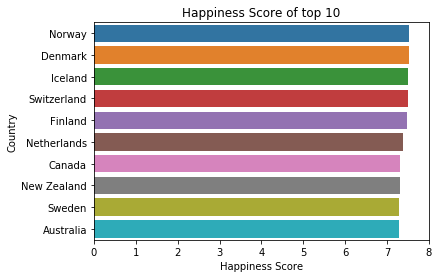

In [11]:
sns.barplot(y = 'Country', x = 'Happiness Score' , data = whr[:10])
plt.title('Happiness Score of top 10')
plt.xlim(0,8)

In [30]:
x1 = np.array(whr['Economy'][0:10]) 
x2 = np.array(whr['Family'][0:10]) 
x3 = np.array(whr['Health'][0:10]) 
x4 = np.array(whr['Freedom'][0:10]) 
x5 = np.array(whr['Generosity'][0:10]) 
x6 = np.array(whr['Corruption'][0:10]) 
x7 = np.array(whr['Dystopia'][0:10]) 


x = list(whr['Country'][0:10]) 

Text(0.5,1,'Happiness of to 10')

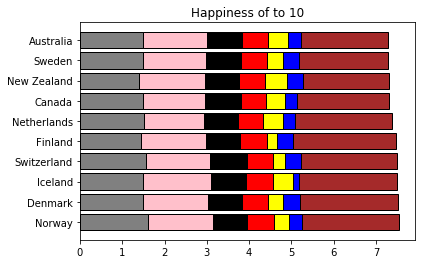

In [31]:
plt.barh(x, x1, edgecolor='black', color='grey') 
plt.barh(x, x2, edgecolor='black', color='pink', left=x1)
plt.barh(x, x3, edgecolor='black', color='black', left=x1+x2)
plt.barh(x, x4, edgecolor='black', color='red', left=x1+x2+x3)
plt.barh(x, x5, edgecolor='black', color='yellow', left=x1+x2+x3+x4) 
plt.barh(x, x6, edgecolor='black', color='blue', left=x1+x2+x3+x4+x5) 
plt.barh(x, x7, edgecolor='black', color='brown', left=x1+x2+x3+x4+x5+x6) 
plt.title('Happiness of to 10')

In [ ]:
plt.barh(x, x1, edgecolor='black', color='grey') 
plt.barh(x, x2, edgecolor='black', color='pink', left=x1)
plt.barh(x, x3, edgecolor='black', color='black', left=x1+x2)
plt.barh(x, x4, edgecolor='black', color='red', left=x1+x2+x3)
plt.barh(x, x5, edgecolor='black', color='yellow', left=x1+x2+x3+x4) 
plt.barh(x, x6, edgecolor='black', color='blue', left=x1+x2+x3+x4+x5) 
plt.barh(x, x7, edgecolor='black', color='brown', left=x1+x2+x3+x4+x5+x6) 
plt.title('Happiness of to 10')

Text(0.5,1,'Happiness of top 10 in Africa')

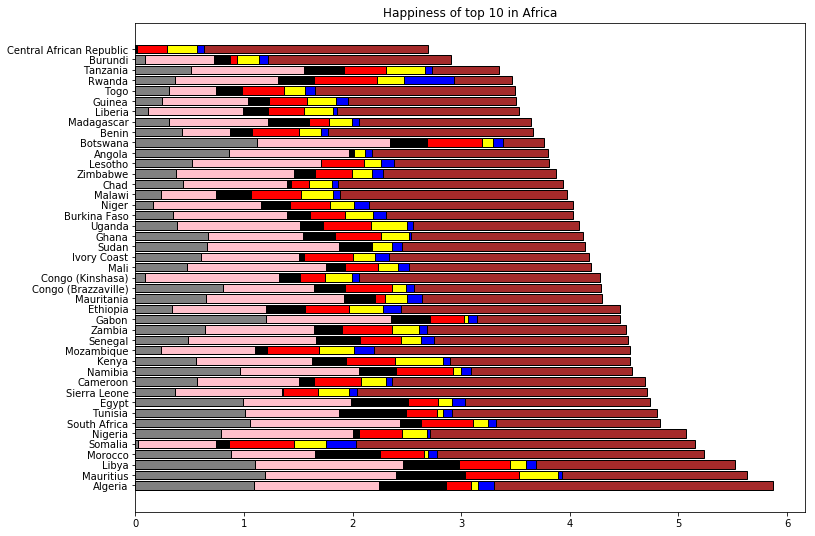

In [39]:
y1 = np.array(regions.get_group('Africa')['Economy']) 
y2 = np.array(regions.get_group('Africa')['Family']) 
y3 = np.array(regions.get_group('Africa')['Health']) 
y4 = np.array(regions.get_group('Africa')['Freedom']) 
y5 = np.array(regions.get_group('Africa')['Generosity']) 
y6 = np.array(regions.get_group('Africa')['Corruption']) 
y7 = np.array(regions.get_group('Africa')['Dystopia']) 
y = list(regions.get_group('Africa')['Country']) 

plt.figure(figsize = (12,9))
plt.barh(y, y1, edgecolor='black', color='grey') 
plt.barh(y, y2, edgecolor='black', color='pink', left=y1)
plt.barh(y, y3, edgecolor='black', color='black', left=y1+y2)
plt.barh(y, y4, edgecolor='black', color='red', left=y1+y2+y3)
plt.barh(y, y5, edgecolor='black', color='yellow', left=y1+y2+y3+y4) 
plt.barh(y, y6, edgecolor='black', color='blue', left=y1+y2+y3+y4+y5) 
plt.barh(y, y7, edgecolor='black', color='brown', left=y1+y2+y3+y4+y5+y6) 
plt.title('Happiness of top 10 in Africa')


Text(0.5,1,'Job Satisfaction')

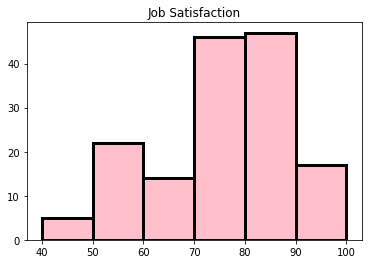

In [46]:
plt.hist(whr['Job Satisfaction'],bins = 6, range = (40,100),edgecolor = 'black',lw = '3', color = 'pink')
plt.title('Job Satisfaction')

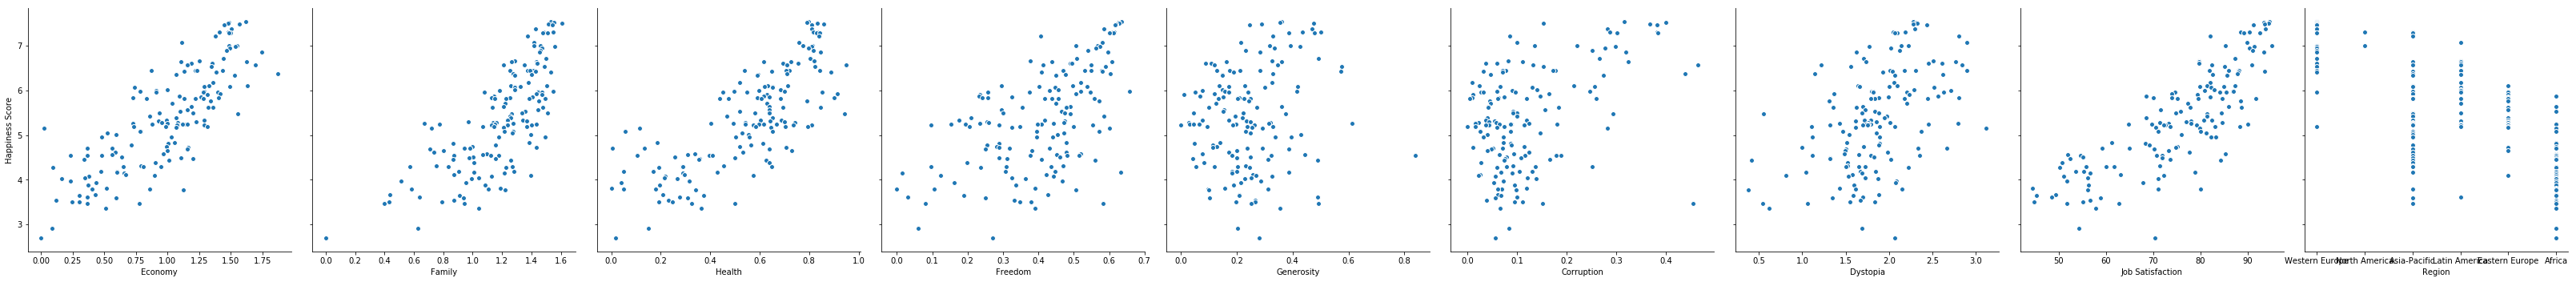

In [56]:
sns.pairplot(data = whr,x_vars = whr.drop(['Happiness Score','Country', 'Happiness Rank'], axis = 1).columns , y_vars = "Happiness Score",size = 5)

In [67]:
whr.corr()['Happiness Score'].drop(['Happiness Rank', 'Happiness Score'])

Economy             0.808678
Family              0.749612
Health              0.777731
Freedom             0.567948
Generosity          0.164123
Corruption          0.438262
Dystopia            0.481117
Job Satisfaction    0.812873
Name: Happiness Score, dtype: float64

In [79]:
z = whr[whr['Happiness Score']>6].count().max()
n = regions.get_group('Western Europe')[regions.get_group('Western Europe')['Happiness Score']>6].count().max()

p = n/z
p = round(p,2)
print('The probability that a Randomly selected Country from Western Europe has a Happiness Score over 6 is: ',p)

The probability that a Randomly selected Country from Western Europe has a Happiness Score over 6 is:  0.39


In [100]:
pivoted = whr.pivot(columns = 'Region', index = 'Country', values = 'Region')
pivoted.fillna(0, inplace=True)
dic = {'Africa':1,'Western Europe':1,'Latin America':1,'Africa':1,'Eastern Europe':1,'Asia-Pacific':1,'North America':1}
pivoted = pivoted.replace(dic)

pivoted.values

array([[0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
 